##Clustering Based Anomaly Detection & K-Means Clustering
                        Submitted By - Samson Raj Babu Raj
                          Student Id - 22013145**

1**.Importing the Required Library Packages**

In [25]:
# Import Required Packages
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

2**. Read the Dataset**

The Provided dataset Penguin.csv is loaded in Colab Notebook and top rows are shown below.

In [26]:
# Read the Dataset and Show the rows and columns.
df = pd.read_csv("penguin.csv")
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


3**. Data Preprocessing**
       
* Number of instance[0] - Total no.of.data samples present in the provided datasets

* Number of instance[1] - Total no.of.data feature column present in the provided datasets

* Check if there is any missing values in the provided dataset.


      
      

In [27]:
# Data Preprocessing Technique - No of samples & Features - Missing values.
print(('Number of Instances % d ') % (df.shape[0]))
print(('Number of Features % d ') % (df.shape[1]))
df.isna().any()
df.isnull()

Number of Instances  344 
Number of Features  5 


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,False,False,False,False
...,...,...,...,...,...
339,True,True,True,True,True
340,False,False,False,False,False
341,False,False,False,False,False
342,False,False,False,False,False


4**.Analysing Data Distribution in the DataFrame.**
*   The distribution of data is analysed by a Box and Whisker plot.
*   This method helps to understand the range of Data spread, its Median and Outliers by Inter Quantile Range(IQR).



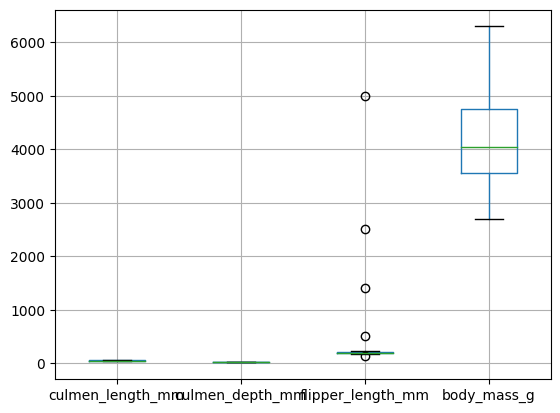

In [28]:
# Plot the Boxplot and show the plot
df.boxplot()
plt.show()

5**.Feature Selection .**

*   The required feature for the analysis is selected - The speices Culmen length , flipper length , clumen depth , body mass and the Null values are dropped from the selected feature.


In [29]:
# Selecting the required Features
feature = ["culmen_length_mm" , "flipper_length_mm", "culmen_depth_mm","body_mass_g"]

#Drop null values present the fearure selection and show the data
Df = df.dropna(subset = feature)
Df

#Save and show the featured data.
FData = Df[feature].copy()
FData

,culmen_length_mm,flipper_length_mm,culmen_depth_mm,body_mass_g
0,39.1,181.0,18.7,3750.0
1,39.5,186.0,17.4,3800.0
2,40.3,195.0,18.0,3250.0
4,36.7,193.0,19.3,3450.0
5,39.3,190.0,20.6,3650.0
...,...,...,...,...
338,47.2,214.0,13.7,4925.0
340,46.8,215.0,14.3,4850.0
341,50.4,222.0,15.7,5750.0
342,45.2,212.0,14.8,5200.0


6 **.Data Normalisation and Scaling the Featured data**

*   Treating the value equally in all the features in the datasets

*   Scaler - MinMaxScaler.
\[
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\]

where:
- \(X\) is the original feature value,
- \(X_{\text{min}}\) is the minimum value of the feature in the dataset,
- \(X_{\text{max}}\) is the maximum value of the feature in the dataset.


*   The selected feature is plotted in a box plot to analyse the ditribution of the data to find any anomaly is present in the Feature selected Dataframe.It is found that flipper length has anomaly and the data is not spread equally.



2.Initalize the random centroids
3.Label each data point
4.Update the centroids
5 Repeat step 3 and 4 untill centroids stop changing.(minmaxscaling)

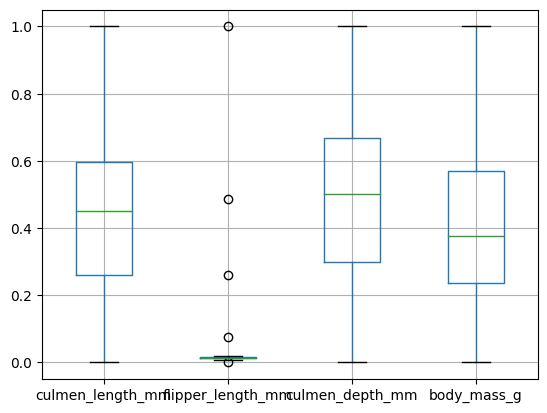

In [30]:
## Scaling the data using Min Max Scaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(FData)
df_scaled = pd.DataFrame(scaled_data, columns = FData.columns)
df_scaled.boxplot()
plt.show()

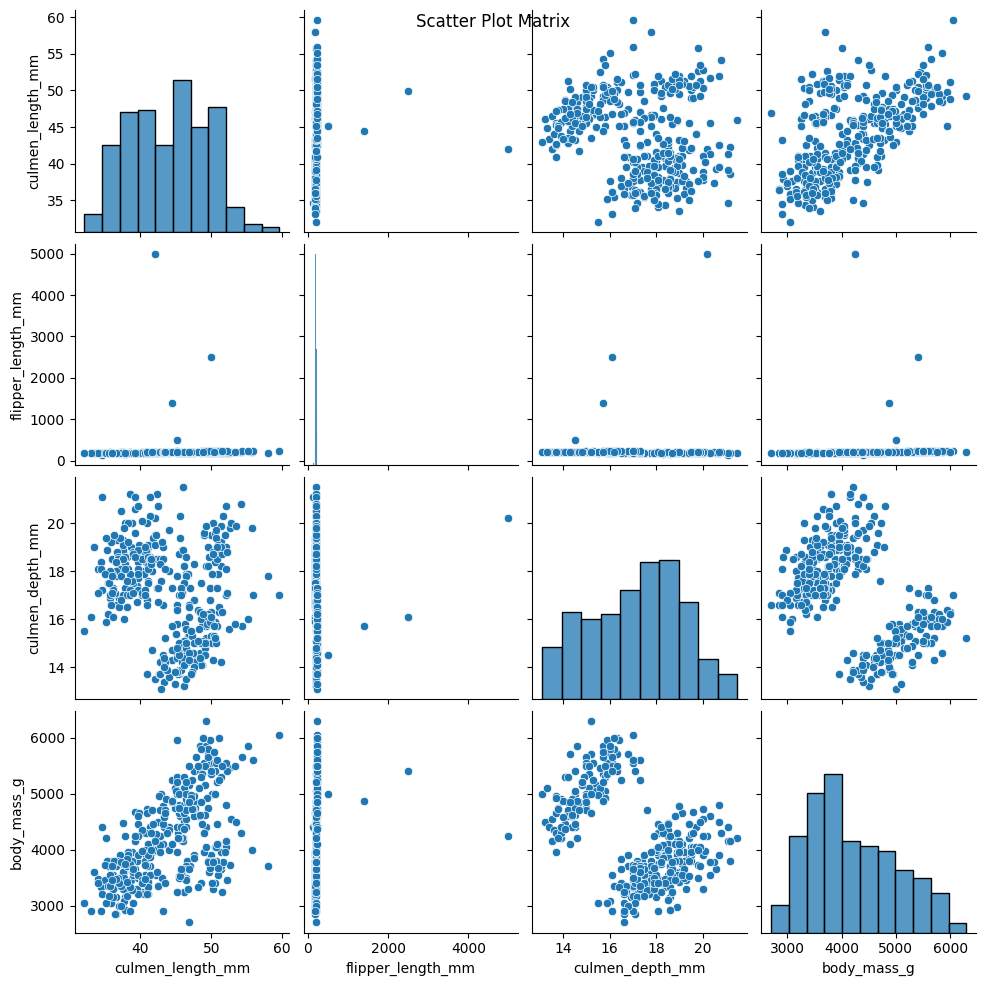

In [31]:
# Scatter plot matrix
sns.pairplot(Df[feature])
plt.suptitle("Scatter Plot Matrix")
plt.show()

7 **.Describe the data**

The scaled data is analysed with all the statistics for find the spread of its Data after scaling.

In [32]:
df_scaled.describe()

,culmen_length_mm,flipper_length_mm,culmen_depth_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,0.429888,0.019262,0.482282,0.417154
std,0.198530,0.060629,0.235094,0.222765
min,0.000000,0.000000,0.000000,0.000000
25%,0.259091,0.011915,0.297619,0.236111
50%,0.449091,0.013353,0.500000,0.375000
75%,0.596364,0.016845,0.666667,0.569444
max,1.000000,1.000000,1.000000,1.000000


8 **. Anomaly Detection Technique - Local Outlier Factor**

LOF computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

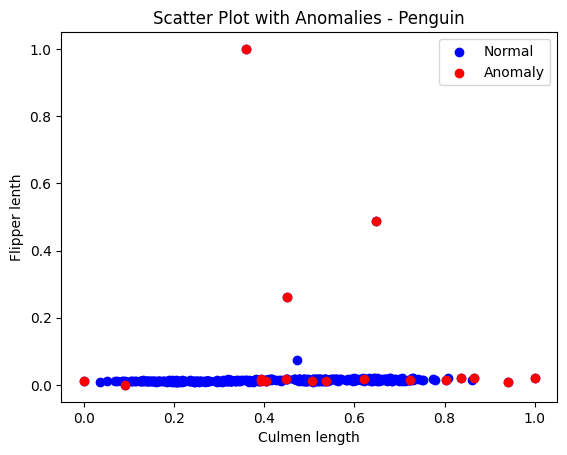

In [33]:
# fit the scaled dataframe.
df_scaled = scaler.fit_transform(df_scaled)

# Use Local Outlier Factor (LOF) for anomaly detection
lof = LocalOutlierFactor(contamination=0.05)
outlier_labels = lof.fit_predict(df_scaled)

# Identify anomalies
anomalies = np.where(outlier_labels == -1)[0]

# Plot the anomaly in Scatter plot
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c='blue', label='Normal')
plt.scatter(df_scaled[anomalies, 0], df_scaled[anomalies, 1], c='red', label='Anomaly')
plt.title('Scatter Plot with Anomalies - Penguin')
plt.xlabel('Culmen length')
plt.ylabel('Flipper lenth')
plt.legend()
plt.show()

9 **.K - Means Algorithm**
The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.The process is repeated untill it reached the minimum distance in the clusters.

*   Centroids Selection - Random
*   Euclidian Distance - d(\mathbf {p,q})= \sqrt{\sum \limits_{i=1}^n (q_i-p_i)^2}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

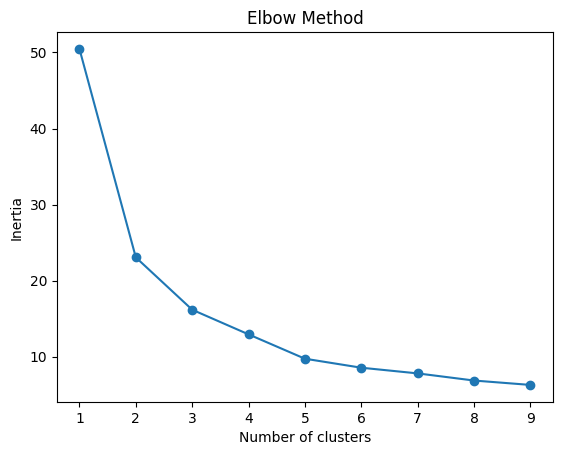

In [34]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=10).fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


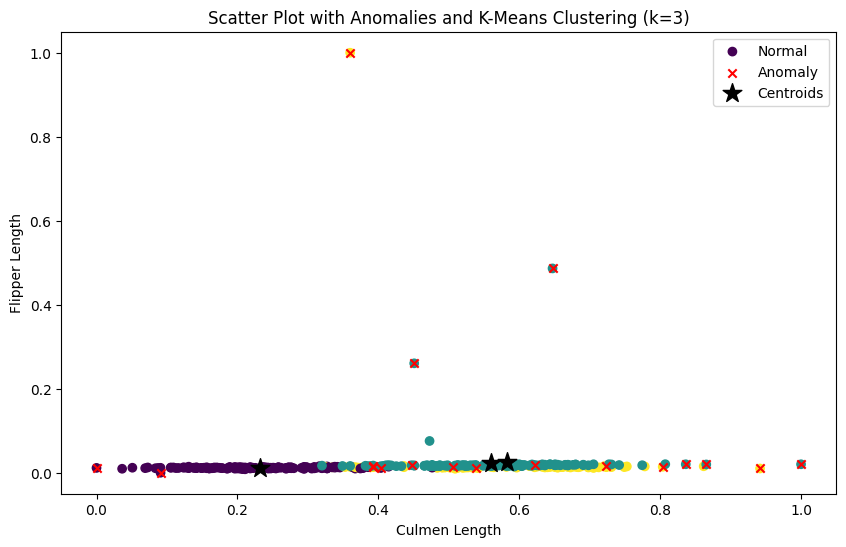

In [35]:
# number of clusters
k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=10).fit(df_scaled)
cluster_labels = kmeans.labels_

# Create the plot
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=cluster_labels, cmap='viridis', label='Normal')

# Plot anomalies
plt.scatter(df_scaled[anomalies, 0], df_scaled[anomalies, 1], c='red', marker='x', label='Anomaly')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='*', label='Centroids')

plt.title('Scatter Plot with Anomalies and K-Means Clustering (k={})'.format(k))
plt.xlabel('Culmen Length')
plt.ylabel('Flipper Length')
plt.legend()
plt.show()
